## Radiative Transfer (```rad_transfer```)

In [2]:
import empylib.rad_transfer as rt
import empylib.nklib as nk
import numpy as np
import matplotlib.pyplot as plt

For radiative transfer we rely on two libraries:
- ```rad_transfer``` with functions for simple calculations (e.g., Beer–Lambert)
- ```iadpython``` for multiple‑scattering simulations

### Beer–Lambert (```T_beer_lambert```)
The function ```T_beer_lambert``` in ```empylib.rad_transfer``` computes total/specular transmittance through a slab of thickness $d$ containing inclusions.

**Inputs**
- ```lam```: Wavelength grid (in $\mu$m)
- ```theta```: Incidence angle (radians)
- ```tfilm```: Film thickness (mm)
- ```N```: Refractive index of the top medium, slab, and bottom medium (tuple, ```len(N) = 3```)
- ```fv```: Volume fraction of inclusions (0.01 corresponds to 1% v/v)
- ```D```: Particle diameter (in $\mu$m)
- ```Np```: Particle refractive index (must satisfy ```len(Np) = len(lam)```)

**Outputs**
- ```Ttot```: Total transmittance
- ```Rtot```: Total reflectance
- ```Tspec```: Specular transmittance
- ```Rspec```: Specular reflectance

In the example below we model a **water film** with suspended **silica** particles with the following characteristics:
- Water film thickness: 1 mm
- Silica particle concentration: 0.1 % v/v
- Particle size: $0.3$ $\mu$m
- Spectrum $\lambda\in[0.3,1.0]$ $\mu$m


In the next example, we consider a **silica film** with inclusions; the upper and lower media are air. The light is incident at $\theta_i = 0^\circ$.

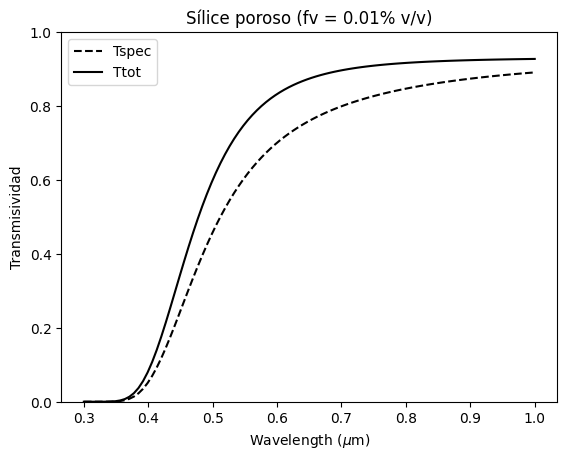

In [3]:
lam = np.linspace(0.3,1.0,100)  # wavelength grid (in microns)
theta = np.radians(0)           # 30 degrees in radians
tfilm = 1.0                     # thickness in mm
N = (1.0,nk.SiO2(lam),1.0)      # refractive index: top, slab, bottom
fv = 0.0001                     # volume fraction of pores/inclusions
D = 0.2                         # pore/particle diameter (microns)
Np = 1.0                        # refractive index of inclusions

Ttot, Rtot, Tspec = rt.T_beer_lambert(lam,theta,tfilm,N,fv,D,Np)

plt.plot(lam,Tspec,'--k',label = 'Tspec')
plt.plot(lam,Ttot,'-k',label = 'Ttot')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Transmisividad')
plt.title(r'Sílice poroso (fv = 0.01% v/v)')
plt.legend()
plt.ylim(0,1)
plt.show()

### Multiple scattering (```adm_sphere```)

The function ```adm_sphere``` in ```empylib.rad_transfer``` implements the **adding–doubling method (ADM)** to solve the radiative transfer equation (RTE) numerically.

**Inputs**
- ```lam```: Wavelength grid (in $\mu$m)
- ```theta```: Incidence angle (radians)
- ```tfilm```: Film thickness (mm)
- ```N```: Refractive index of the top medium, slab, and bottom medium (tuple, ```len(N) = 3```)
- ```fv```: Volume fraction of inclusions (0.01 corresponds to 1% v/v)
- ```D```: Particle diameter (in $\mu$m)
- ```Np```: Particle refractive index (must satisfy ```len(Np) = len(lam)```)

**Outputs**
- ```Ttot```: Total transmittance
- ```Rtot```: Total reflectance
- ```Tspec```: Specular transmittance
- ```Rspec```: Specular reflectance

In the example, we again model a **water film** with suspended **silica** particles using ADM over $\lambda\in[0.3,1.0]$ $\mu$m.


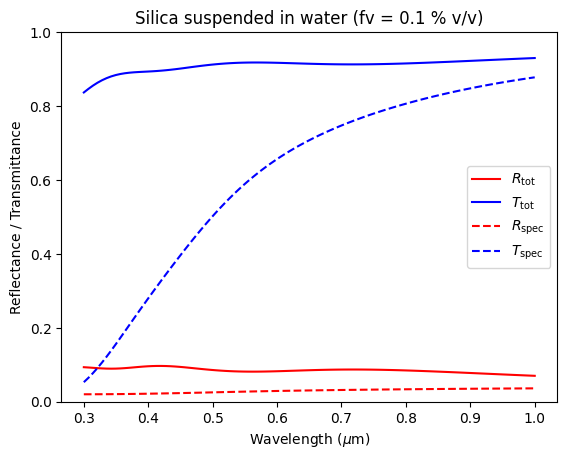

In [5]:
lam = np.linspace(0.3,1.0,100) # espectro de longitudes de onda
tfilm = 1                      # thickness in mm
Nh = 1.33                       # índice de refracción del medio (agua)
fv = 0.001                     # volume fraction of pores/inclusions
D = 0.3                        # pore/particle diameter (microns)
Np = nk.SiO2(lam)              # índice de refracción partícula

Ttot, Rtot, Tspec, Rspec = rt.adm_sphere(lam,tfilm,fv,D,Np,Nh)

plt.plot(lam,Rtot,'-r',label='$R_\mathrm{tot}$')
plt.plot(lam,Ttot,'-b',label='$T_\mathrm{tot}$')
plt.plot(lam,Rspec,'--r',label='$R_\mathrm{spec}$')
plt.plot(lam,Tspec,'--b',label='$T_\mathrm{spec}$')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Reflectance / Transmittance')
plt.title(r'Silica suspended in water (fv = %.1f %% v/v)' % (fv*100))
plt.legend()
plt.ylim(0,1)
plt.show()